<a href="https://colab.research.google.com/github/iceaiai/CS-Kid-teaching/blob/main/AIES_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This notebook is created for co-working on the final project for AIES (2024 summer)
#Download link: https://www.kaggle.com/datasets/sidharth178/credit-data

Step 1

In [ ]:
import pandas as pd
Dataset_name = 'credit_data.csv'
df = pd.read_csv(Dataset_name)
#Drop all the row with null. Need to add a note in report
df_clean = df.fillna(0)
#print(df_clean)
#number of observation
print(f'Numbers of observations after data cleaning is {df_clean.shape[0]}')


Numbers of observations after data cleaning is 50636


In [ ]:
#check the income status
print(df_clean['annual_income'].describe())
print(df_clean['annual_income'].value_counts(bins=10, sort=False))

# Examine the distribution of 'no_card'
print(df_clean['no_card'].describe())
print(df_clean['no_card'].value_counts()) # people hold card 0, 1, 2.

# Examine the distribution of 'default'
print(df_clean['default'].describe())
print(df_clean['default'].value_counts())

count     50636.000000
mean     277243.989889
std      153838.973755
min       50000.000000
25%      154052.250000
50%      258860.500000
75%      385071.500000
max      999844.000000
Name: annual_income, dtype: float64
annual_income
(49050.155000000006, 144984.4]    11585
(144984.4, 239968.8]              11419
(239968.8, 334953.2]              10410
(334953.2, 429937.6]               8614
(429937.6, 524922.0]               6594
(524922.0, 619906.4]                762
(619906.4, 714890.8]                650
(714890.8, 809875.2]                185
(809875.2, 904859.6]                181
(904859.6, 999844.0]                236
Name: count, dtype: int64
count    50636.000000
mean         0.509815
std          0.669883
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: no_card, dtype: float64
no_card
0    29855
1    15747
2     5034
Name: count, dtype: int64
count    50636.000000
mean         0.158425
std          0.365142
m

In [ ]:
#From description, the applicants are very rich or the currency might not be US dollars.
# Eligible for Premium Card i.e. Black card for Amex
df_clean['eligible_for_premium'] = (df_clean['annual_income'] > 400000) & (df_clean['default'] == 0) #400000 is about top 20%

Step 2.4

Gender vs. Eligible for Premium Card

In [ ]:
#Usage of pd.crosstab: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
freq_gender_premium = pd.crosstab(df_clean['gender'], df_clean['eligible_for_premium'])
freq_gender_premium

eligible_for_premium,False,True
gender,,
Female,11574,2875
Male,29557,6630


Gender vs. Default

In [ ]:
freq_gender_default = pd.crosstab(df_clean['gender'], df_clean['default'])
freq_gender_default

default,0,1
gender,,
Female,12742,1707
Male,29872,6315


Age vs. Eligible for Premium Card

<Axes: xlabel='age_group'>

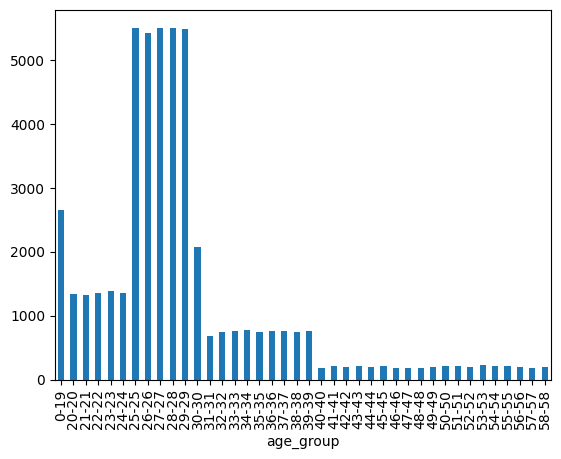

In [ ]:
#Check the age distribution to determine the bin
# pd.cut segment data: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [0] + [i for i in range(20, 65, 1)]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Check the distribution of age groups
age_group_distribution = df_clean['age_group'].value_counts().sort_index()

# Display the distribution
age_group_distribution.iloc[:40].plot(kind = 'bar') #plot <58

In [ ]:
#reasonable age range
bins = [18,27,40,100]
age_labels = ['18-27','28-40','41+']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=age_labels, right=False)


Clean dataset

In [ ]:
df_clean.to_csv("/credit_data_clean.csv", index=False)

Age vs. Eligible for premium

In [ ]:
freq_age_premium = pd.crosstab(df_clean['age_group'], df_clean['eligible_for_premium'])
freq_age_premium

eligible_for_premium,False,True
age_group,,
18-27,16910,3421
28-40,20381,4959
41+,3840,1125


Age vs. Default

In [ ]:
freq_age_default = pd.crosstab(df_clean['age_group'], df_clean['default'])
freq_age_default

default,0,1
age_group,,
18-27,15307,5024
28-40,22569,2771
41+,4738,227


Step 2.5

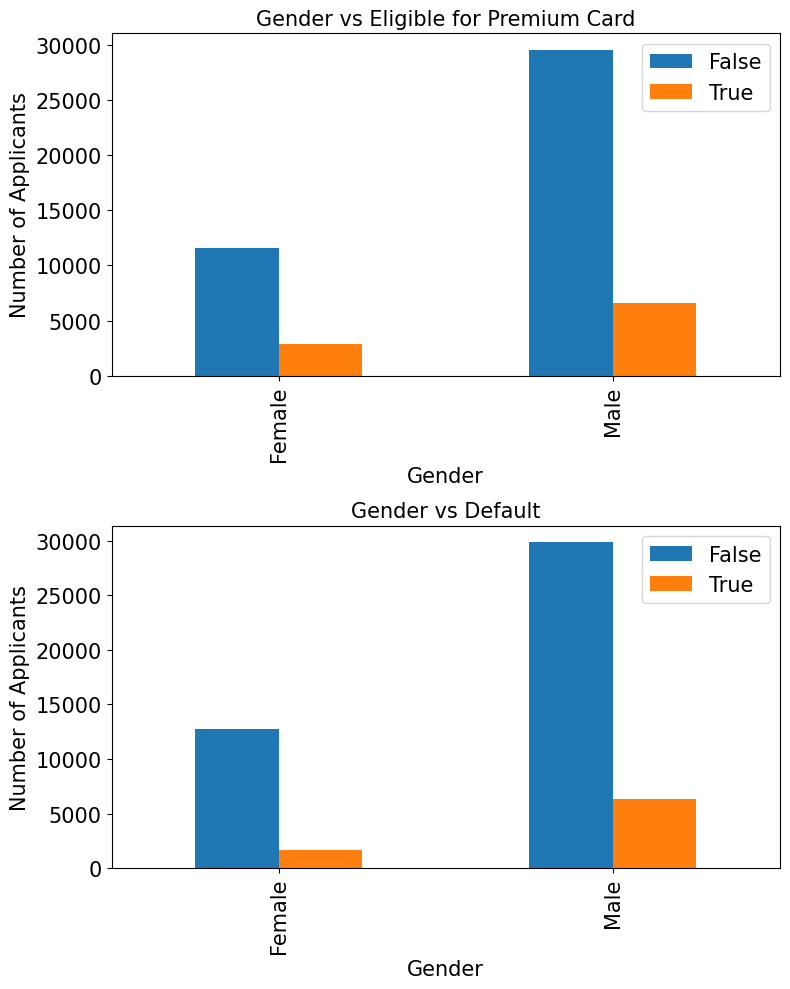

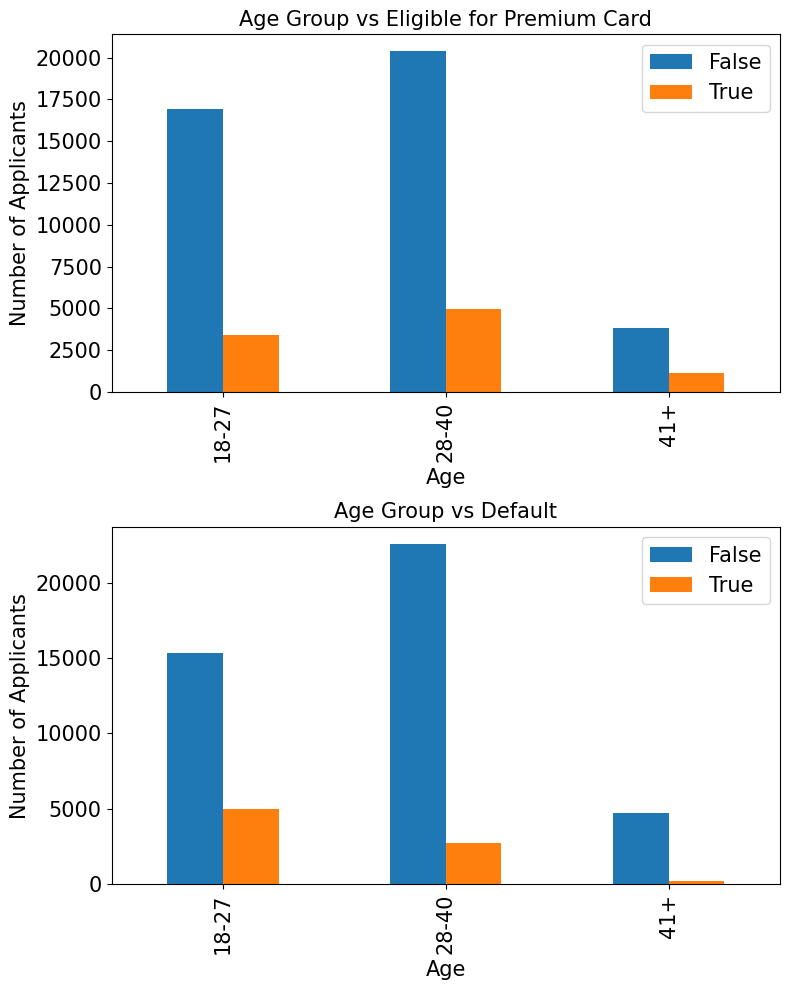

In [ ]:
import matplotlib.pyplot as plt

# Create bar charts for Gender
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

freq_gender_premium.plot(kind='bar', ax=ax[0], fontsize=15)
ax[0].set_title('Gender vs Eligible for Premium Card', fontsize=15)
ax[0].set_ylabel('Number of Applicants', fontsize=15)
ax[0].set_xlabel('Gender', fontsize=15)
ax[0].legend(['False', 'True'], fontsize=15)

freq_gender_default.plot(kind='bar', ax=ax[1], fontsize=15)
ax[1].set_title('Gender vs Default', fontsize=15)
ax[1].set_ylabel('Number of Applicants', fontsize=15)
ax[1].set_xlabel('Gender', fontsize=15)
ax[1].legend(['False', 'True'], fontsize=15)

plt.tight_layout()
plt.show()



# Create bar charts for Age Group
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

freq_age_premium.plot(kind='bar', ax=ax[0], fontsize=15)
ax[0].set_title('Age Group vs Eligible for Premium Card', fontsize=15)
ax[0].set_ylabel('Number of Applicants', fontsize=15)
ax[0].set_xlabel('Age', fontsize=15)
ax[0].legend(['False', 'True'], fontsize=15)

freq_age_default.plot(kind='bar', ax=ax[1], fontsize=15)
ax[1].set_title('Age Group vs Default', fontsize=15)
ax[1].set_ylabel('Number of Applicants', fontsize=15)
ax[1].set_xlabel('Age', fontsize=15)
ax[1].legend(['False', 'True'], fontsize=15)

plt.tight_layout()
plt.show()

Step 3
1. Statistical Parity Difference
2. Equal Opportunity Difference
3. Average Odds Difference
4. Disparate Impact
5. Theil Index

Calculate metrics for original dataset

In [ ]:
import numpy as np

# SPD: SPD = P(Ŷ = 1 | A = 0) - P(Ŷ = 1 | A = 1)
# Imagine 100 male and 100 female applying for credit card. If 70 male and 50 female are approved, then:SPD = 70/100−50/100=0.2
def statistical_parity_difference(df, protected_col, privileged_group, predicted_col):
    p_privileged = df[df[protected_col] == privileged_group][predicted_col].mean()# mean = all 1(TP)/all 1+0 (TP+FN) only valid for binary
    p_unprivileged = df[df[protected_col] != privileged_group][predicted_col].mean()
    return p_privileged - p_unprivileged

# DI: P(Ŷ = 1 | A = 0) / P(Ŷ = 1 | A = 1)
# Easy: DI = 0.7/0.5 = 1.4
def disparate_impact(df, protected_col, privileged_group, predicted_col):
    p_privileged = df[df[protected_col] == privileged_group][predicted_col].mean()
    p_unprivileged = df[df[protected_col] != privileged_group][predicted_col].mean()
    return p_unprivileged / p_privileged



# Calculate metrics for Gender
#priviliged
spd_gender_premium_privileged = statistical_parity_difference(df_clean, 'gender', 'Male', 'eligible_for_premium')
di_gender_premium_privileged = disparate_impact(df_clean, 'gender', 'Male', 'eligible_for_premium')
spd_gender_default_privileged = statistical_parity_difference(df_clean, 'gender', 'Male', 'default')
di_gender_default_privileged = disparate_impact(df_clean, 'gender', 'Male', 'default')
#unpriviliged
spd_gender_premium_unprivileged = statistical_parity_difference(df_clean, 'gender', 'Female', 'eligible_for_premium')
di_gender_premium_unprivileged = disparate_impact(df_clean, 'gender', 'Female', 'eligible_for_premium')
spd_gender_default_unprivileged = statistical_parity_difference(df_clean, 'gender', 'Female', 'default')
di_gender_default_unprivileged = disparate_impact(df_clean, 'gender', 'Female', 'default')

# Compile gender results into a table1
gender_results = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender']*8,
    'Group': ['Privileged', 'Privileged', 'Privileged', 'Privileged', 'Unprivileged', 'Unprivileged', 'Unprivileged', 'Unprivileged'],
    'Outcome Variable': ['Eligible for Premium','Eligible for Premium','Default','Default']*2,
    'Value': [spd_gender_premium_privileged, di_gender_premium_privileged,
              spd_gender_default_privileged, di_gender_default_privileged,
              spd_gender_premium_unprivileged, di_gender_premium_unprivileged,
              spd_gender_default_unprivileged, di_gender_default_unprivileged]
})

# Calculate metrics for Age Group
#priviliged
spd_age_premium_privileged = statistical_parity_difference(df_clean, 'age_group', '28-40', 'eligible_for_premium')
di_age_premium_privileged = disparate_impact(df_clean, 'age_group', '28-40', 'eligible_for_premium')
spd_age_default_privileged = statistical_parity_difference(df_clean, 'age_group', '28-40', 'default')
di_age_default_privileged = disparate_impact(df_clean, 'age_group', '28-40', 'default')
#unpriviliged-part 1
spd_age_premium_unprivileged_18_27 = statistical_parity_difference(df_clean, 'age_group', '18-27', 'eligible_for_premium')
di_age_premium_unprivileged_18_27 = disparate_impact(df_clean, 'age_group', '18-27', 'eligible_for_premium')
spd_age_default_unprivileged_18_27 = statistical_parity_difference(df_clean, 'age_group', '18-27', 'default')
di_age_default_unprivileged_18_27 = disparate_impact(df_clean, 'age_group', '18-27', 'default')
#unpriviliged-part 2 (can we combine them?)
spd_age_premium_unprivileged_41 = statistical_parity_difference(df_clean, 'age_group', '41+', 'eligible_for_premium')
di_age_premium_unprivileged_41 = disparate_impact(df_clean, 'age_group', '41+', 'eligible_for_premium')
spd_age_default_unprivileged_41 = statistical_parity_difference(df_clean, 'age_group', '41+', 'default')
di_age_default_unprivileged_41 = disparate_impact(df_clean, 'age_group', '41+', 'default')

# Compile age results into table2
age_results = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Age Group']*12,
    'Group': ['Privileged', 'Privileged', 'Privileged', 'Privileged',
              'Unprivileged 18-27', 'Unprivileged 18-27', 'Unprivileged 18-27', 'Unprivileged 18-27',
              'Unprivileged 41+', 'Unprivileged 41+', 'Unprivileged 41+', 'Unprivileged 41+'],
    'Outcome Variable': ['Eligible for Premium','Eligible for Premium','Default','Default']*3,
    'Value': [spd_age_premium_privileged, di_age_premium_privileged, #can combine two group here.
              spd_age_default_privileged, di_age_default_privileged,
              spd_age_premium_unprivileged_18_27, di_age_premium_unprivileged_18_27,
              spd_age_default_unprivileged_18_27, di_age_default_unprivileged_18_27,
              spd_age_premium_unprivileged_41, di_age_premium_unprivileged_41,
              spd_age_default_unprivileged_41, di_age_default_unprivileged_41]
})


In [ ]:
gender_results

,Fairness Metric,Protected Class,Group,Outcome Variable,Value
0,SPD,Gender,Privileged,Eligible for Premium,-0.015761
1,DI,Gender,Privileged,Eligible for Premium,1.086023
2,SPD,Gender,Privileged,Default,0.056371
3,DI,Gender,Privileged,Default,0.676979
4,SPD,Gender,Unprivileged,Eligible for Premium,0.015761
5,DI,Gender,Unprivileged,Eligible for Premium,0.920791
6,SPD,Gender,Unprivileged,Default,-0.056371
7,DI,Gender,Unprivileged,Default,1.477152


In [ ]:
age_results

,Fairness Metric,Protected Class,Group,Outcome Variable,Value
0,SPD,Age Group,Privileged,Eligible for Premium,0.015986
1,DI,Age Group,Privileged,Eligible for Premium,0.918312
2,SPD,Age Group,Privileged,Default,-0.098229
3,DI,Age Group,Privileged,Default,1.898280
4,SPD,Age Group,Unprivileged 18-27,Eligible for Premium,-0.032494
5,DI,Age Group,Unprivileged 18-27,Eligible for Premium,1.193110
6,SPD,Age Group,Unprivileged 18-27,Default,0.148183
7,DI,Age Group,Unprivileged 18-27,Default,0.400338
8,SPD,Age Group,Unprivileged 41+,Eligible for Premium,0.043100
9,DI,Age Group,Unprivileged 41+,Eligible for Premium,0.809786


Bias Mitigation

In [ ]:
#Check the original Dataset
df_clean.columns.tolist()
# 15 columns

['age',
 'gender',
 'education',
 'occupation',
 'organization_type',
 'seniority',
 'annual_income',
 'disposable_income',
 'house_type',
 'vehicle_type',
 'marital_status',
 'no_card',
 'default',
 'eligible_for_premium',
 'age_group']

In [ ]:
# Encode dataset to numerical
from sklearn.preprocessing import MinMaxScaler

def encode_df(df_clean):

  # convert ordinal to numeric
  df_encoded = df_clean.drop('age', axis=1)
  df_encoded['gender'] = df_encoded['gender'].replace({'Male': 1, 'Female': 2})
  df_encoded['age_group'] = df_encoded['age_group'].replace({'18-27': 1, '28-40': 2, '41+': 3})
  df_encoded['marital_status'] = df_encoded['marital_status'].replace({'Single': 1, 'Married': 2, 'Other': 3})
  df_encoded['education'] = df_encoded['education'].replace({'Under Graduate': 1, 'Graduate': 2, 'Post Graduate': 3, 'Other': 4})
  df_encoded['occupation'] = df_encoded['occupation'].replace({'Student': 1, 'Professional': 2, 'Salaried': 3, 'Business': 4})
  df_encoded['organization_type'] = df_encoded['organization_type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
  df_encoded['seniority'] = df_encoded['seniority'].replace({'Entry': 1, 'Junior': 2, 'Mid-level 1': 3, 'Mid-level 2': 4, 'Senior': 5})
  df_encoded['house_type'] = df_encoded['house_type'].replace({'Rented': 1, 'Company provided': 2, 'Owned': 3, 'Family': 4})
  df_encoded['vehicle_type'] = df_encoded['vehicle_type'].replace({'Two Wheeler': 1, 'Four Wheeler': 2, 'Other': 3})

  df_encoded = df_encoded.astype(int)

  # Normalize the two salary columns
  salary_columns = ['annual_income', 'disposable_income']

  # Create a MinMaxScaler object
  scaler = MinMaxScaler()

  # Fit the scaler to the selected columns and transform them
  df_encoded[salary_columns] = scaler.fit_transform(df_encoded[salary_columns])

  return df_encoded

df_clean_transf = encode_df(df_clean)

df_clean_transf.head()

###### Now we have the final encoded (numerical) clean dataset

,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default,eligible_for_premium,age_group
0,1,2,2,0,0,0.143517,0.420927,4,0,2,0,1,0,1
1,1,1,2,0,0,0.239010,0.396784,1,0,2,0,1,0,1
2,1,1,3,0,1,0.314447,0.477642,1,0,2,1,1,0,2
3,1,2,1,0,0,0.121116,0.031286,1,0,2,0,1,0,1
4,1,3,3,0,3,0.314520,0.373906,1,0,2,1,1,0,1


In [ ]:
'''
# Identify non-numeric columns and encode them
#pd.get_dummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
non_numeric_cols = df_clean.select_dtypes(include=['object', 'category']).columns
df_clean_transf = pd.get_dummies(df_clean, columns=non_numeric_cols, drop_first=True)#get_dummies just like one-hot in NLP.
#check if the missing columns will be used later
df_clean_transf.columns.tolist()
'''

df_clean_transf.columns.tolist()

['gender',
 'education',
 'occupation',
 'organization_type',
 'seniority',
 'annual_income',
 'disposable_income',
 'house_type',
 'vehicle_type',
 'marital_status',
 'no_card',
 'default',
 'eligible_for_premium',
 'age_group']

Bias Mitigation - Disparate Impact Remover

In [ ]:
# We can use aif360 per ED https://edstem.org/us/courses/57223/discussion/5097985
!pip install aif360
!pip install BlackBoxAuditing #per error
from aif360.algorithms.preprocessing import DisparateImpactRemover #DI remover
from aif360.datasets import StandardDataset #To use the DisparateImpactRemover, we need to convert our pandas DataFrame into a StandardDataset object.
#https://aif360.readthedocs.io/en/latest/modules/generated/aif360.datasets.StandardDataset.html
from imblearn.combine import SMOTEENN
import copy

gender_col = 'gender'
age_col_28_40 = 'age_group'
# Select relevant columns and create a StandardDataset
def process_outcome_variable(df, label_name, gender_col, age_col):
    '''
    df_orig = copy.deepcopy(df)
    X = df_orig.drop([label_name], axis=1)
    y = df_orig[label_name]
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    df_orig[label_name] = y_resampled
    df_orig.loc[:, df_orig.columns != label_name] = X_resampled
    '''

    df_orig = copy.deepcopy(df)
    dataset_orig = StandardDataset(df_orig,label_name=label_name, favorable_classes=[1],  # Set favorable outcome (y = 1)
    protected_attribute_names=[gender_col, age_col],privileged_classes=[[1], [2]])
    di_remover = DisparateImpactRemover(repair_level=1.0)  # Complete repair level(1.0)
    dataset_transf = di_remover.fit_transform(dataset_orig)
    df_transf = dataset_transf.convert_to_dataframe()[0]
    return df_transf

#### derive the transformed dataset
import copy

# transform based on the eligible for premium variable
df_transf_default = process_outcome_variable(df_clean_transf, 'default', gender_col, age_col_28_40)
df_transf_premium = copy.deepcopy(df_transf_default)
# df_transf_default = process_outcome_variable(df_clean_transf, 'default', gender_col, age_col_28_40)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394753 sha256=d54105124d0829ff5deecf70181a558a707b20a9f532776b984f152615870e3f
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [ ]:
df_clean_transf.to_csv('credit_data_clean.csv')
df_transf_default.to_csv('credit_data_t.csv')

Calc metrics for the transformed dataset

In [ ]:
spd_gender_premium_privileged_transf = statistical_parity_difference(df_transf_premium, gender_col, 1, 'eligible_for_premium')
di_gender_premium_privileged_transf = disparate_impact(df_transf_premium, gender_col, 1, 'eligible_for_premium')
spd_gender_premium_unprivileged_transf = statistical_parity_difference(df_transf_premium, gender_col, 2, 'eligible_for_premium')
di_gender_premium_unprivileged_transf = disparate_impact(df_transf_premium, gender_col, 2, 'eligible_for_premium')

spd_gender_default_privileged_transf = statistical_parity_difference(df_transf_default, gender_col, 1, 'default')
di_gender_default_privileged_transf = disparate_impact(df_transf_default, gender_col, 1, 'default')
spd_gender_default_unprivileged_transf = statistical_parity_difference(df_transf_default, gender_col, 2, 'default')
di_gender_default_unprivileged_transf = disparate_impact(df_transf_default, gender_col, 2, 'default')

# Compile gender results into table
'''
gender_results_transf = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender']*8,
    'Group': ['Privileged', 'Privileged', 'Unprivileged', 'Unprivileged', 'Privileged', 'Privileged', 'Unprivileged', 'Unprivileged'],
    'Outcome Variable': ['Eligible for Premium']*4 + ['Default']*4,
    'Value': [spd_gender_premium_privileged_transf, di_gender_premium_privileged_transf,spd_gender_premium_unprivileged_transf, di_gender_premium_unprivileged_transf,
spd_gender_default_privileged_transf, di_gender_default_privileged_transf,spd_gender_default_unprivileged_transf, di_gender_default_unprivileged_transf]
})
'''

gender_results_transf = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender']*4,
    'Group': ['Privileged', 'Privileged', 'Privileged', 'Privileged'],
    'Outcome Variable': ['Eligible for Premium']*2 + ['Default']*2,
    'Value': [spd_gender_premium_privileged_transf, di_gender_premium_privileged_transf,
spd_gender_default_privileged_transf, di_gender_default_privileged_transf]
})

# Calculate metrics for Age Group on transformed 'eligible_for_premium' dataset
spd_age_premium_privileged_transf = statistical_parity_difference(df_transf_premium, age_col_28_40, 2, 'eligible_for_premium')
di_age_premium_privileged_transf = disparate_impact(df_transf_premium, age_col_28_40, 2, 'eligible_for_premium')
spd_age_premium_unprivileged_18_27_transf = statistical_parity_difference(df_transf_premium, age_col_28_40, 1, 'eligible_for_premium')
di_age_premium_unprivileged_18_27_transf = disparate_impact(df_transf_premium, age_col_28_40, 1, 'eligible_for_premium')
spd_age_premium_unprivileged_41_transf = statistical_parity_difference(df_transf_premium, age_col_28_40, 3, 'eligible_for_premium')
di_age_premium_unprivileged_41_transf = disparate_impact(df_transf_premium, age_col_28_40, 3, 'eligible_for_premium')

# Calculate metrics for Age Group on transformed 'default' dataset
spd_age_default_privileged_transf = statistical_parity_difference(df_transf_default, age_col_28_40, 2, 'default')
di_age_default_privileged_transf = disparate_impact(df_transf_default, age_col_28_40, 2, 'default')
spd_age_default_unprivileged_18_27_transf = statistical_parity_difference(df_transf_default, age_col_28_40, 1, 'default')
di_age_default_unprivileged_18_27_transf = disparate_impact(df_transf_default, age_col_28_40, 1, 'default')
spd_age_default_unprivileged_41_transf = statistical_parity_difference(df_transf_default, age_col_28_40, 3, 'default')
di_age_default_unprivileged_41_transf = disparate_impact(df_transf_default, age_col_28_40, 3, 'default')

# Compile age results into a table
'''
age_results_transf = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Age Group']*12,
    'Group': ['Privileged', 'Privileged', 'Unprivileged 18-27', 'Unprivileged 18-27', 'Unprivileged 41+', 'Unprivileged 41+']*2,
    'Outcome Variable': ['Eligible for Premium']*6 + ['Default']*6,
    'Value': [spd_age_premium_privileged_transf, di_age_premium_privileged_transf,
  spd_age_premium_unprivileged_18_27_transf, di_age_premium_unprivileged_18_27_transf,
  spd_age_premium_unprivileged_41_transf, di_age_premium_unprivileged_41_transf,
  spd_age_default_privileged_transf, di_age_default_privileged_transf,
  spd_age_default_unprivileged_18_27_transf, di_age_default_unprivileged_18_27_transf,
  spd_age_default_unprivileged_41_transf, di_age_default_unprivileged_41_transf]
})
'''

age_results_transf = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Age Group']*4,
    'Group': ['Privileged', 'Privileged']*2,
    'Outcome Variable': ['Eligible for Premium']*2 + ['Default']*2,
    'Value': [spd_age_premium_privileged_transf, di_age_premium_privileged_transf,
  spd_age_default_privileged_transf, di_age_default_privileged_transf,
]
})

In [ ]:
gender_results_transf

,Fairness Metric,Protected Class,Group,Outcome Variable,Value
0,SPD,Gender,Privileged,Eligible for Premium,-0.015761
1,DI,Gender,Privileged,Eligible for Premium,1.086023
2,SPD,Gender,Privileged,Default,0.056371
3,DI,Gender,Privileged,Default,0.676979


In [ ]:
age_results_transf

,Fairness Metric,Protected Class,Group,Outcome Variable,Value
0,SPD,Age Group,Privileged,Eligible for Premium,0.015986
1,DI,Age Group,Privileged,Eligible for Premium,0.918312
2,SPD,Age Group,Privileged,Default,-0.098229
3,DI,Age Group,Privileged,Default,1.898280


Reweighting

In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import StandardDataset

# Define function to process outcome variable with reweighting and print weights
def process_with_reweighting(df, label_name, gender_col, age_col):
    df_orig = copy.deepcopy(df)
    dataset_orig = StandardDataset(df_orig, label_name=label_name, favorable_classes=[1],
                                   protected_attribute_names=[gender_col, age_col],
                                   privileged_classes=[[1], [2]])
    reweighing = Reweighing(unprivileged_groups=[{gender_col: 2}, {age_col: 1}, {age_col: 3}],
                            privileged_groups=[{gender_col: 1}, {age_col: 2}])
    dataset_transf = reweighing.fit_transform(dataset_orig)

    # Extract and print instance weights
    instance_weights = dataset_transf.instance_weights
    df_transf = dataset_transf.convert_to_dataframe()[0]

    # Print weight distribution
    df_transf['instance_weights'] = instance_weights
    print("\nWeight distribution by group:")
    print(df_transf.groupby(gender_col)['instance_weights'].describe())
    print(df_transf.groupby(age_col)['instance_weights'].describe())

    return df_transf

# Transform datasets with reweighting
df_transf_default_rw = process_with_reweighting(df_clean_transf, 'default', 'gender', 'age_group')
df_transf_premium_rw = process_with_reweighting(df_clean_transf, 'eligible_for_premium', 'gender', 'age_group')

#weight difference is so small!!!


Weight distribution by group:
          count      mean       std       min       25%       50%      75%  \
gender                                                                       
1.0     36187.0  0.996360  0.046224  0.873742  1.001301  1.001301  1.02774   
2.0     14449.0  1.009441  0.048314  0.873742  1.026405  1.026405  1.02774   

            max  
gender           
1.0     1.02774  
2.0     1.02774  
             count      mean       std       min       25%       50%      75%  \
age_group                                                                       
1.0        20331.0  0.989681  0.065756  0.873742  1.026405  1.027740  1.02774   
2.0        25340.0  1.004466  0.024472  0.873742  1.001301  1.001301  1.02774   
3.0         4965.0  1.020409  0.031705  0.873742  1.026405  1.027740  1.02774   

               max  
age_group           
1.0        1.02774  
2.0        1.02774  
3.0        1.02774  

Weight distribution by group:
          count      mean       std       

Mannual tune the weight

In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import StandardDataset

# Define function to process outcome variable with reweighting and modify weights
def process_with_modified_weights(df, label_name, gender_col, age_col):
    df_orig = copy.deepcopy(df)
    dataset_orig = StandardDataset(df_orig, label_name=label_name, favorable_classes=[1],
                                   protected_attribute_names=[gender_col, age_col],
                                   privileged_classes=[[1], [2]])
    reweighing = Reweighing(unprivileged_groups=[{gender_col: 2}, {age_col: 1}, {age_col: 3}],
                            privileged_groups=[{gender_col: 1}, {age_col: 2}])
    dataset_transf = reweighing.fit_transform(dataset_orig)

    # Extract instance weights
    instance_weights = dataset_transf.instance_weights

    # Artificially modify instance weights
    instance_weights[dataset_transf.protected_attributes[:, 0] == 2] *= 10  # Increase weights for unprivileged gender group
    instance_weights[dataset_transf.protected_attributes[:, 1] == 1] *= 5  # Increase weights for unprivileged age group
    instance_weights[dataset_transf.protected_attributes[:, 1] == 3] *= 2  # Increase weights for another unprivileged age group

    df_transf = dataset_transf.convert_to_dataframe()[0]
    df_transf['instance_weights'] = instance_weights
    return df_transf

# Transform datasets with modified weights
df_transf_default_mod = process_with_modified_weights(df_clean_transf, 'default', 'gender', 'age_group')
df_transf_premium_mod = process_with_modified_weights(df_clean_transf, 'eligible_for_premium', 'gender', 'age_group')


In [ ]:
# Calculate fairness metrics for Modified weights data
# Gender metrics
spd_gender_default_mod = statistical_parity_difference(df_transf_default_mod, 'gender', 1, 'default')
di_gender_default_mod = disparate_impact(df_transf_default_mod, 'gender', 1, 'default')
spd_gender_premium_mod = statistical_parity_difference(df_transf_premium_mod, 'gender', 1, 'eligible_for_premium')
di_gender_premium_mod = disparate_impact(df_transf_premium_mod, 'gender', 1, 'eligible_for_premium')

# Age group metrics
spd_age_default_mod = statistical_parity_difference(df_transf_default_mod, 'age_group', 2, 'default')
di_age_default_mod = disparate_impact(df_transf_default_mod, 'age_group', 2, 'default')
spd_age_premium_mod = statistical_parity_difference(df_transf_premium_mod, 'age_group', 2, 'eligible_for_premium')
di_age_premium_mod = disparate_impact(df_transf_premium_mod, 'age_group', 2, 'eligible_for_premium')

# Compile Gender Modified metrics into table
gender_mod_metrics = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender']*4,
    'Group': ['Privileged']*4,
    'Outcome Variable': ['Eligible for Premium', 'Eligible for Premium', 'Default', 'Default'],
    'Value': [spd_gender_premium_mod, di_gender_premium_mod, spd_gender_default_mod, di_gender_default_mod]
})

# Compile Age Group Modified metrics into table
age_mod_metrics = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Age Group']*4,
    'Group': ['Privileged']*4,
    'Outcome Variable': ['Eligible for Premium', 'Eligible for Premium', 'Default', 'Default'],
    'Value': [spd_age_premium_mod, di_age_premium_mod, spd_age_default_mod, di_age_default_mod]
})

# Save metrics to CSV
gender_mod_metrics.to_csv('gender_modified_weights_fairness_metrics.csv', index=False)
age_mod_metrics.to_csv('age_modified_weights_fairness_metrics.csv', index=False)

# Print the results for comparison
print("\nGender Modified Weights Fairness Metrics:")
print(gender_mod_metrics)
print("\nAge Group Modified Weights Fairness Metrics:")
print(age_mod_metrics)



Gender Modified Weights Fairness Metrics:
  Fairness Metric Protected Class       Group      Outcome Variable     Value
0             SPD          Gender  Privileged  Eligible for Premium -0.015761
1              DI          Gender  Privileged  Eligible for Premium  1.086023
2             SPD          Gender  Privileged               Default  0.056371
3              DI          Gender  Privileged               Default  0.676979

Age Group Modified Weights Fairness Metrics:
  Fairness Metric Protected Class       Group      Outcome Variable     Value
0             SPD       Age Group  Privileged  Eligible for Premium  0.015986
1              DI       Age Group  Privileged  Eligible for Premium  0.918312
2             SPD       Age Group  Privileged               Default -0.098229
3              DI       Age Group  Privileged               Default  1.898280


In [ ]:
gender_rw_metrics

NameError: name 'gender_rw_metrics' is not defined

In [ ]:
age_rw_metrics

NameError: name 'age_rw_metrics' is not defined

Step 4

In [ ]:
import copy

df_encoded = copy.deepcopy(df_clean_transf)

In [ ]:
##### ML Model Fitting #####
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN


def credit_train_test_split(df_credit, response_var, var_remove, test_size):
    '''
    response_var: string of the response variable name
    '''

    X = df_credit.drop([response_var,var_remove], axis=1)
    y = df_credit[response_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test


def fit_model(df_encoded, response_var, var_remove, test_size):
  # train test split
  X_train, X_test, y_train, y_test = credit_train_test_split(df_encoded, response_var, var_remove, 0.5)

  # treat imbalanced dataset
  #smote_enn = SMOTEENN(random_state=42)
  #X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

  # fit model to training data
  model = XGBClassifier()
  model.fit(X_train, y_train)

  # predict on test data
  y_test_pred = model.predict(X_test)
  # print(y_test_pred)
  return X_train, X_test, y_train, y_test, y_test_pred

# # Calculate the performance metrics
# accuracy = accuracy_score(y_test, y_test_pred)
# precision = precision_score(y_test, y_test_pred)
# recall = recall_score(y_test, y_test_pred)
# f1 = f1_score(y_test, y_test_pred)
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")
'''
# model fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# model prediction
y_test_pred = model.predict(X_test)

np.set_printoptions(threshold=np.inf)
print(y_test_pred)
'''

'\n# model fitting\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\n\n# model prediction\ny_test_pred = model.predict(X_test)\n\nnp.set_printoptions(threshold=np.inf)\nprint(y_test_pred)\n'

In [ ]:
# --- calculate fairness metrics on the original y_test_pred ---
# get the combined df with X_test and y_test_pred
X_train, X_test, y_train, y_test, y_test_pred = fit_model(df_encoded, 'default', 'eligible_for_premium', 0.5)
combined_orig_pred_df = pd.DataFrame(X_test)
combined_orig_pred_df['default'] = y_test_pred

spd_gender_default_orig_pred = statistical_parity_difference(combined_orig_pred_df, 'gender', 1, 'default')
di_gender_default_orig_pred = disparate_impact(combined_orig_pred_df, 'gender', 1, 'default')
spd_age_default_orig_pred = statistical_parity_difference(combined_orig_pred_df, 'age_group', 2, 'default')
di_age_default_orig_pred = disparate_impact(combined_orig_pred_df, 'age_group', 2, 'default')

# Compile gender results into a table1
orig_pred_results = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender'] * 2 + ['Age Group'] * 2,
    'Outcome Variable': ['Default']*4,
    'Value': [spd_gender_default_orig_pred, di_gender_default_orig_pred,
              spd_age_default_orig_pred, di_age_default_orig_pred]
})
orig_pred_results

,Fairness Metric,Protected Class,Outcome Variable,Value
0,SPD,Gender,Default,0.055513
1,DI,Gender,Default,0.340258
2,SPD,Age Group,Default,-0.101890
3,DI,Age Group,Default,6.865596


In [ ]:
# --- calculate fairness metrics on the transformed y_test_pred ---
# got the transformed data
df_transf = process_outcome_variable(df_encoded, 'default', gender_col, age_col_28_40)

# get the combined df with X_test and y_test_pred
X_train_transf, X_test_transf, y_train_transf, y_test_transf, y_test_pred_transf = fit_model(df_transf, 'default', 'eligible_for_premium', 0.5)
combined_transf_pred_df = pd.DataFrame(X_test_transf)
combined_transf_pred_df['default'] = y_test_pred_transf

spd_gender_default_transf_pred = statistical_parity_difference(combined_transf_pred_df, 'gender', 1, 'default')
di_gender_default_transf_pred = disparate_impact(combined_transf_pred_df, 'gender', 1, 'default')
spd_age_default_transf_pred = statistical_parity_difference(combined_transf_pred_df, 'age_group', 2, 'default')
di_age_default_transf_pred = disparate_impact(combined_transf_pred_df, 'age_group', 2, 'default')

# Compile gender results into a table1
transf_pred_results = pd.DataFrame({
    'Fairness Metric': ['SPD', 'DI', 'SPD', 'DI'],
    'Protected Class': ['Gender'] * 2 + ['Age Group'] * 2,
    'Outcome Variable': ['Default']*4,
    'Value': [spd_gender_default_transf_pred, di_gender_default_transf_pred,
              spd_age_default_transf_pred, di_age_default_transf_pred]
})
transf_pred_results



,Fairness Metric,Protected Class,Outcome Variable,Value
0,SPD,Gender,Default,0.053494
1,DI,Gender,Default,0.360471
2,SPD,Age Group,Default,-0.101416
3,DI,Age Group,Default,6.734059


Step 5

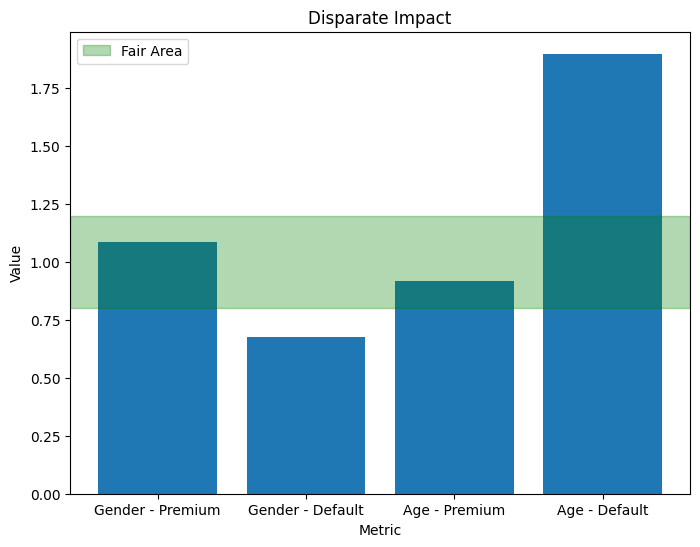

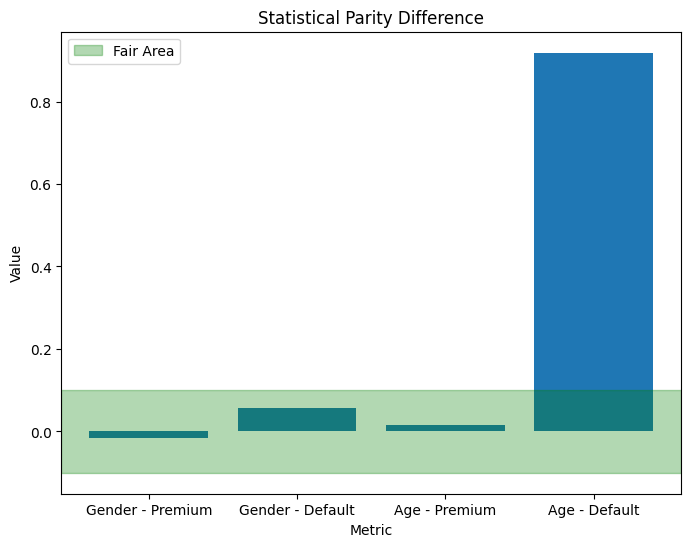

In [ ]:
## --- graph for Step 3.2 ---
%matplotlib inline

# Plot the Disparate Impact
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Premium', 'Gender - Default', 'Age - Premium', 'Age - Default']
y = [di_gender_premium_privileged, di_gender_default_privileged, di_age_premium_privileged, di_age_default_privileged, ]
ax.bar(x, y)
 # Plot the fair area
fair_range = [0.8, 1.2]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')

ax.set_title('Disparate Impact')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('3.2_Disparate_impact_orig.png', dpi=300)
plt.show()

# Plot the Statistical Parity Difference
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Premium', 'Gender - Default', 'Age - Premium', 'Age - Default']
y = [spd_gender_premium_privileged, spd_gender_default_privileged, spd_age_premium_privileged, di_age_premium_privileged]

ax.bar(x, y)
 # Plot the fair area
fair_range = [-0.1, 0.1]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')

ax.set_title('Statistical Parity Difference')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('3.2_Statistical_parity_difference_orig.png', dpi=300)
plt.show()


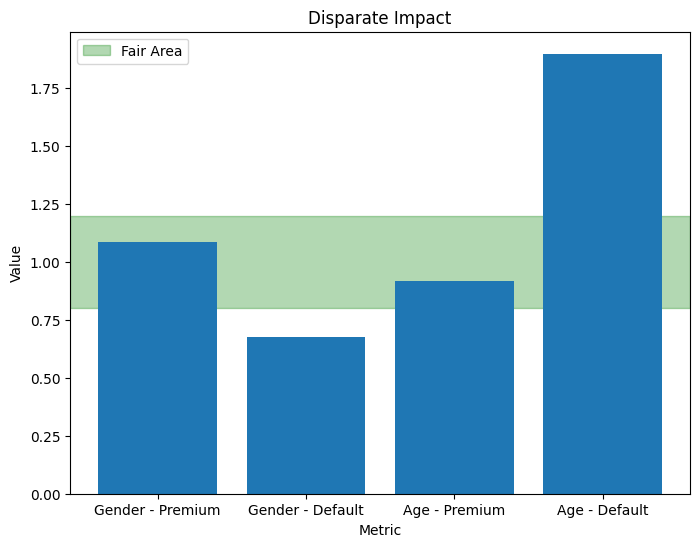

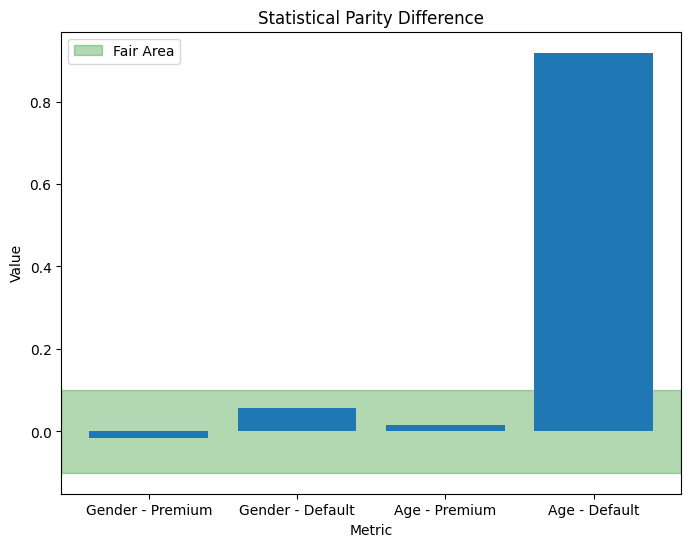

In [ ]:
## --- graph for Step 3.4 ---
%matplotlib inline

# Plot the Disparate Impact
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Premium', 'Gender - Default', 'Age - Premium', 'Age - Default']
y = [di_gender_premium_privileged_transf, di_gender_default_privileged_transf, di_age_premium_privileged_transf, di_age_default_privileged_transf]
 # Plot the fair area
fair_range = [0.8, 1.2]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')

ax.bar(x, y)
ax.set_title('Disparate Impact')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('3.4_Disparate_impact_transf.png', dpi=300)
plt.show()

# Plot the Statistical Parity Difference
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Premium', 'Gender - Default', 'Age - Premium', 'Age - Default']
y = [spd_gender_premium_privileged_transf, spd_gender_default_privileged_transf, spd_age_premium_privileged_transf, di_age_premium_privileged_transf]
 # Plot the fair area
fair_range = [-0.1, 0.1]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')
ax.bar(x, y)
ax.set_title('Statistical Parity Difference')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('3.4_Statistical_parity_difference_transf.png', dpi=300)
plt.show()


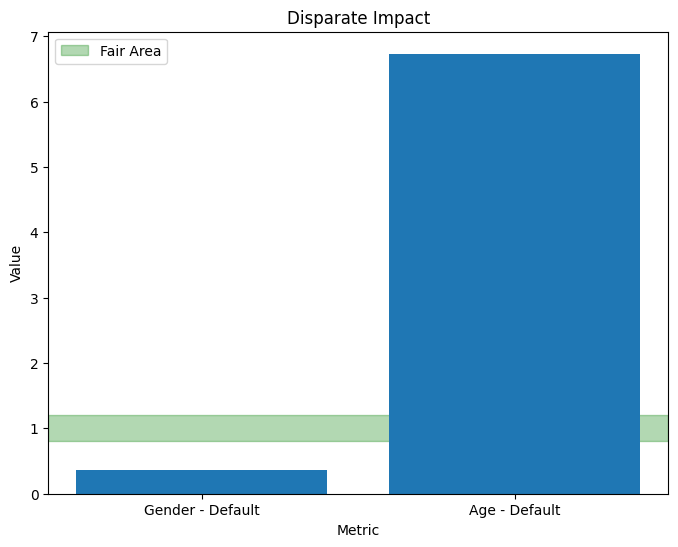

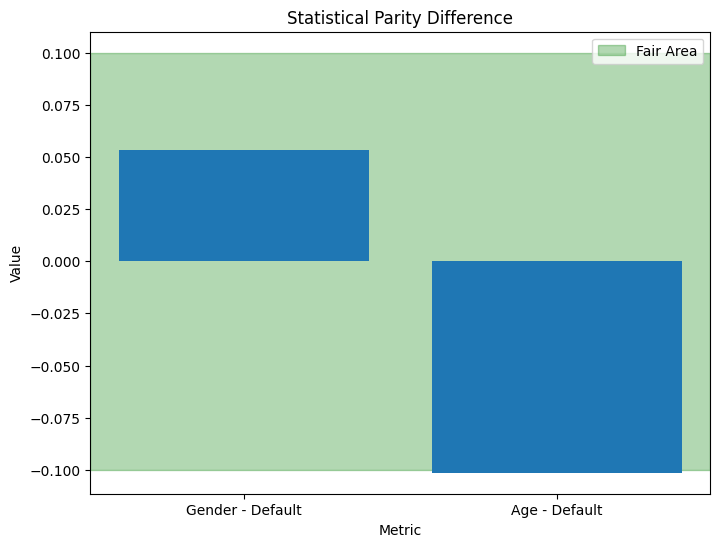

In [ ]:
## --- graph for Step 4.5 ---
%matplotlib inline
# spd_gender_default_transf_pred, di_gender_default_transf_pred,
#               spd_age_default_transf_pred, di_age_default_transf_pred
# Plot the Disparate Impact
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Default', 'Age - Default']
y = [di_gender_default_transf_pred, di_age_default_transf_pred]
 # Plot the fair area
fair_range = [0.8, 1.2]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')
ax.bar(x, y)
ax.set_title('Disparate Impact')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('4.5_Disparate_impact_transf.png', dpi=300)
plt.show()

# Plot the Statistical Parity Difference
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Gender - Default', 'Age - Default']
y = [spd_gender_default_transf_pred, spd_age_default_transf_pred]
 # Plot the fair area
fair_range = [-0.1, 0.1]
ax.axhspan(fair_range[0], fair_range[1], alpha=0.3, color='green', label='Fair Area')
ax.bar(x, y)
ax.set_title('Statistical Parity Difference')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
plt.legend()
plt.savefig('4.5_Statistical_parity_difference_transf.png', dpi=300)
plt.show()